In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# LOAD DATASET

In [95]:
dataset = pd.read_csv("card_transdata.csv")
dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


0.0    912597
1.0     87403
Name: fraud, dtype: int64


<AxesSubplot: ylabel='fraud'>

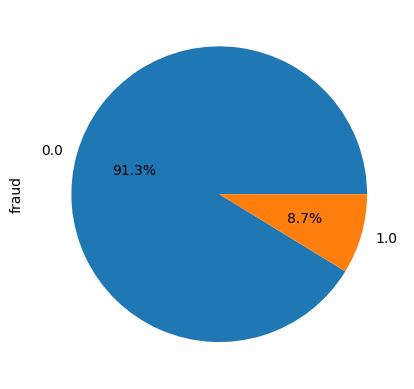

In [121]:
print(dataset["fraud"].value_counts())

dataset["fraud"].value_counts().plot(kind="pie", autopct='%1.1f%%')

# Replace Target value and split dataset

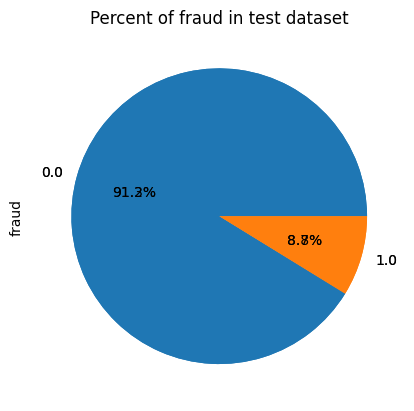

In [129]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt



train, test = train_test_split(dataset, train_size=0.8, random_state=22)

train["fraud"].value_counts().plot(kind="pie", autopct='%1.1f%%', title='Percent of fraud in train dataset')

test["fraud"].value_counts().plot(kind="pie", autopct='%1.1f%%', title='Percent of fraud in test dataset')
plt.show()

#TODO plots are overlap

# Separate target values for training and testing example

In [130]:
x_train = train.loc[:,train.columns!="fraud"]
y_train = train["fraud"]

x_test = test.loc[:,train.columns!="fraud"]
y_test = test["fraud"]

# Gaussian Naive Bayes Classifiers

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn import metrics


gnb = GaussianNB()
fit = gnb.fit(x_train, y_train)
y_pred = fit.predict(x_test)

print("Classification report for classifier %s:\n%s\n" % (gnb, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))


Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    182430
         1.0       0.79      0.59      0.68     17570

    accuracy                           0.95    200000
   macro avg       0.88      0.79      0.83    200000
weighted avg       0.95      0.95      0.95    200000


Confusion matrix:
[[179738   2692]
 [  7192  10378]]


# Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report for classifier LogisticRegression(intercept_scaling=10000.0, max_iter=1000000,
                   solver='liblinear', tol=1e-06, warm_start=True):
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182430
         1.0       0.89      0.60      0.72     17570

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000


Confusion matrix:
[[181161   1269]
 [  7055  10515]]


# Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, y_pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182430
         1.0       1.00      1.00      1.00     17570

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000


Confusion matrix:
[[182429      1]
 [     2  17568]]


# Compare Clasifier

# DATA PLOT

/Users/val/dev/workspace_IMT/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/val/dev/workspace_IMT/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/val/dev/workspace_IMT/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/val/dev/workspace_IMT/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/val/dev/workspace_IMT/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/val/dev/

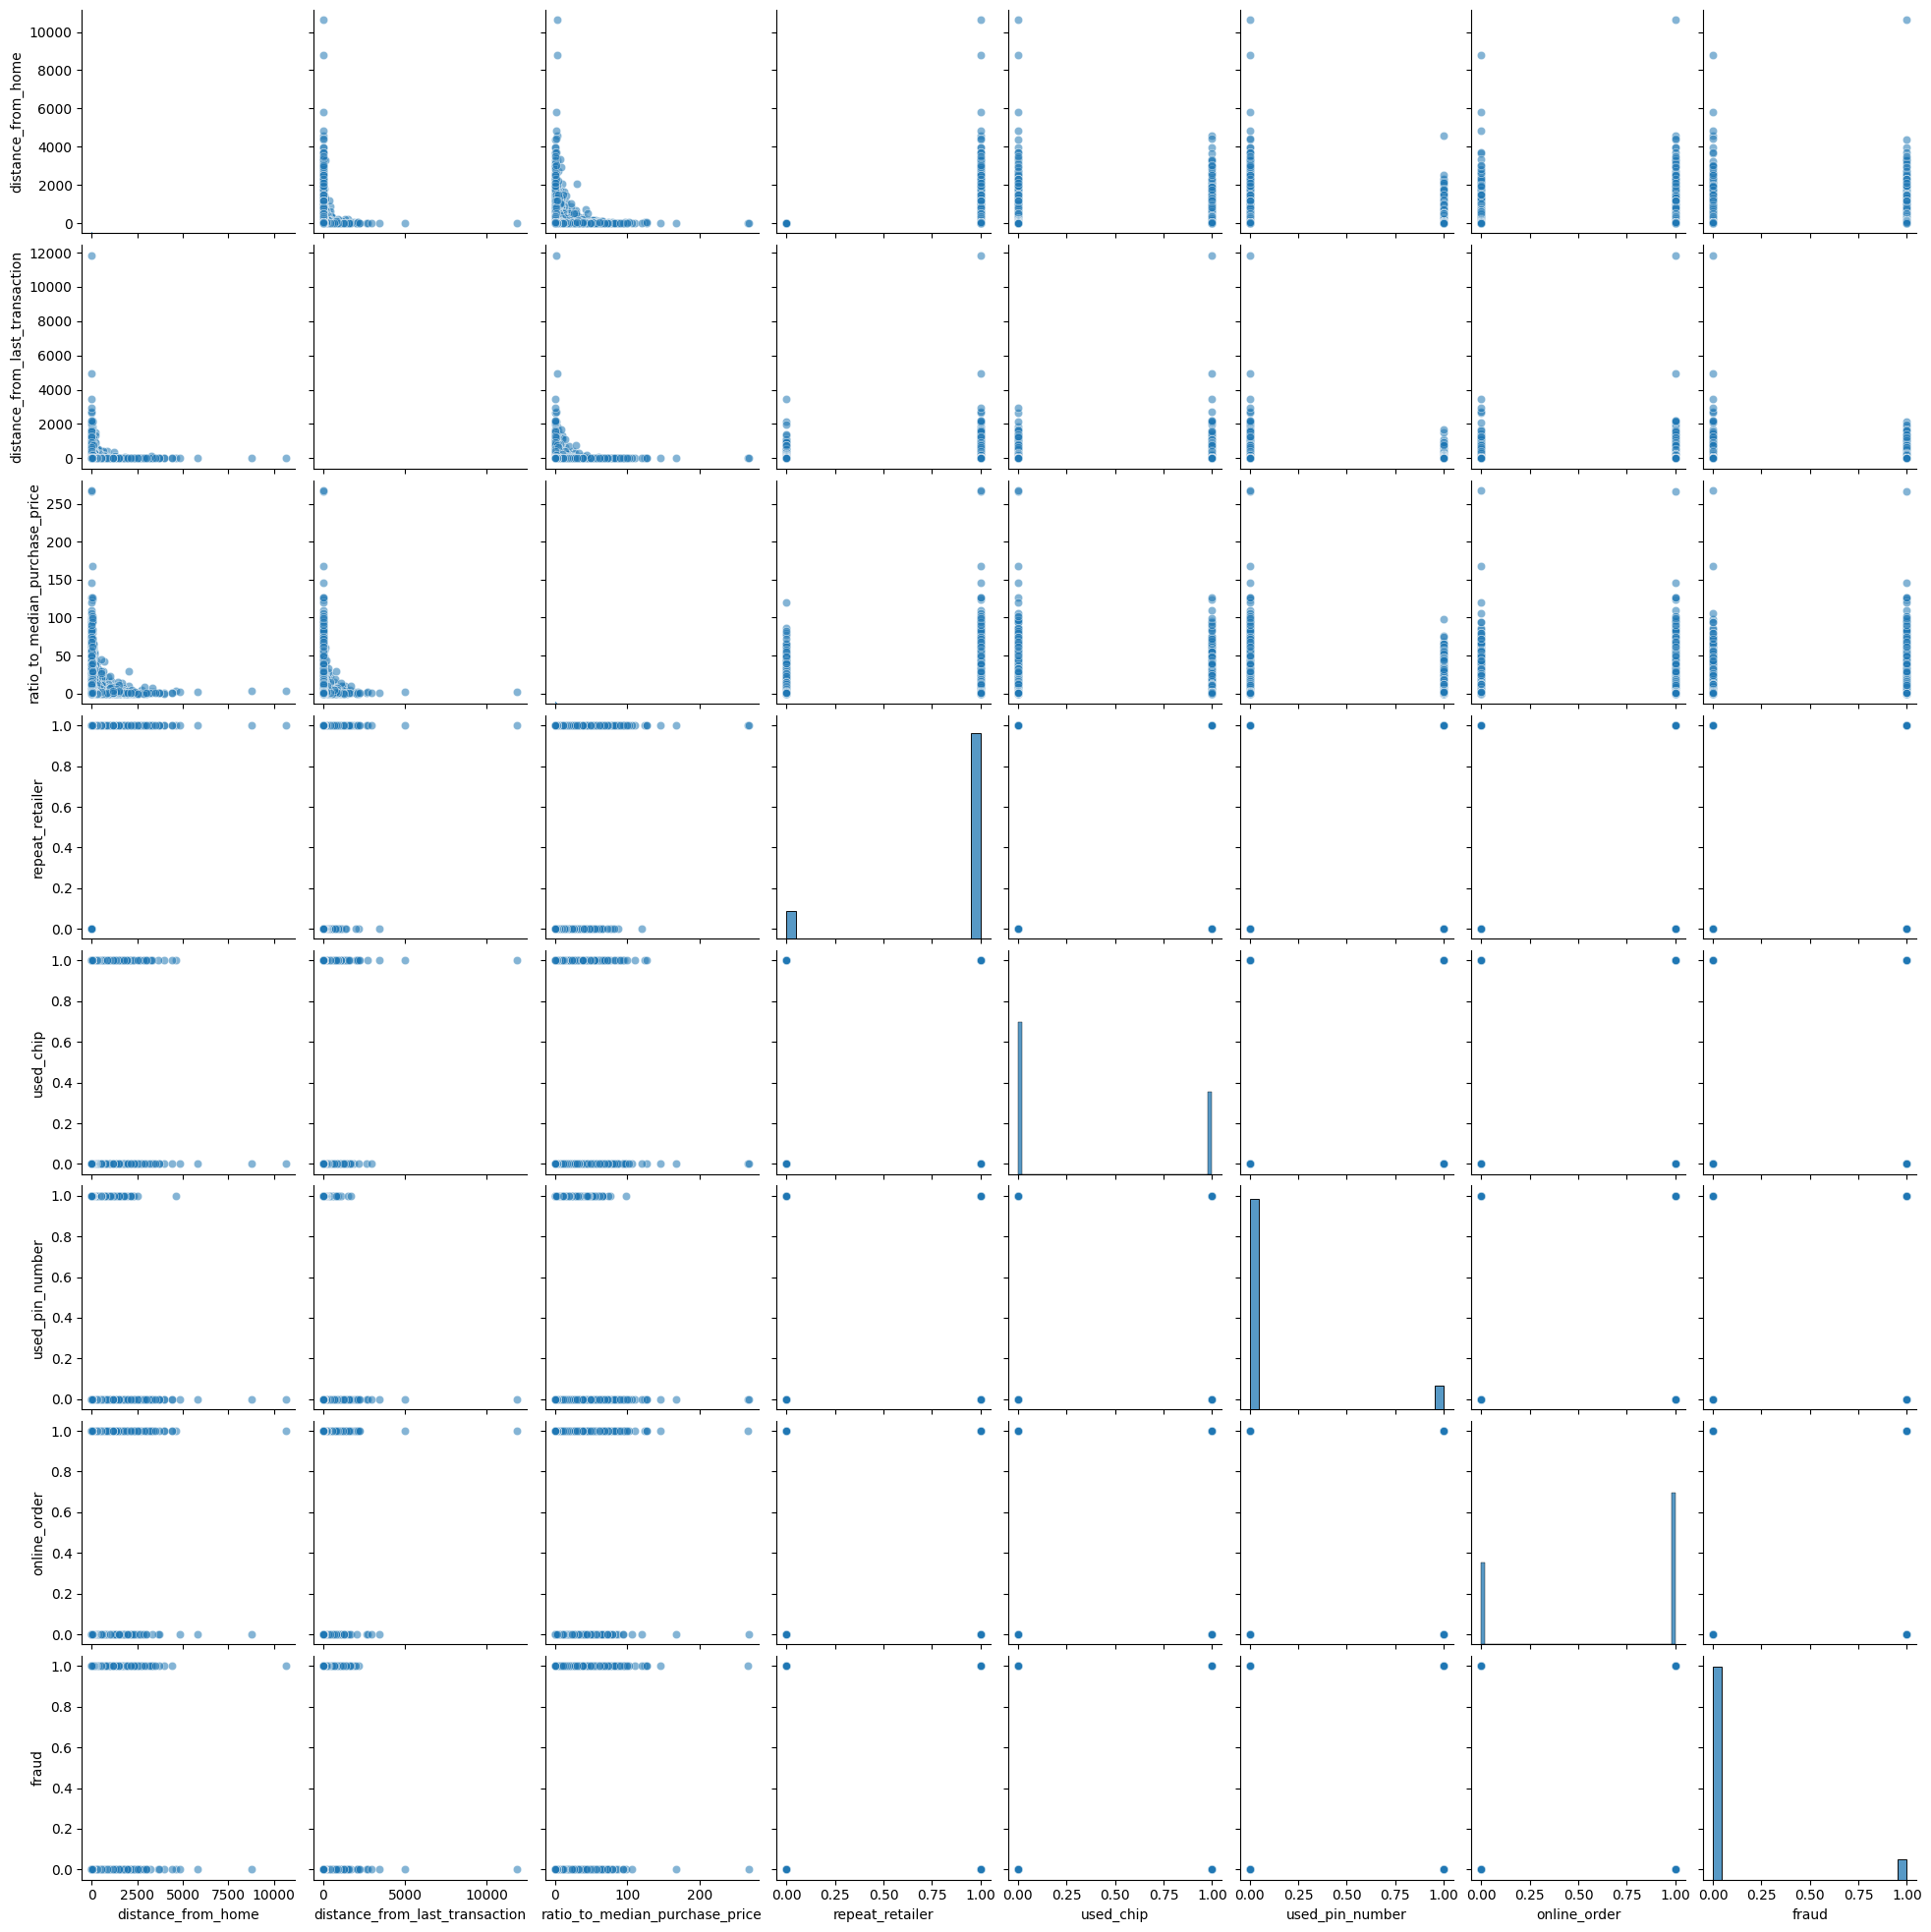

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x126f74310> (for post_execute):


KeyboardInterrupt: 

In [137]:
# Import matplotlib and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create pairplot of all ten mean features
sns.pairplot(dataset,
             hue="fraud",
             palette="dark",
             plot_kws=dict(alpha=0.55))

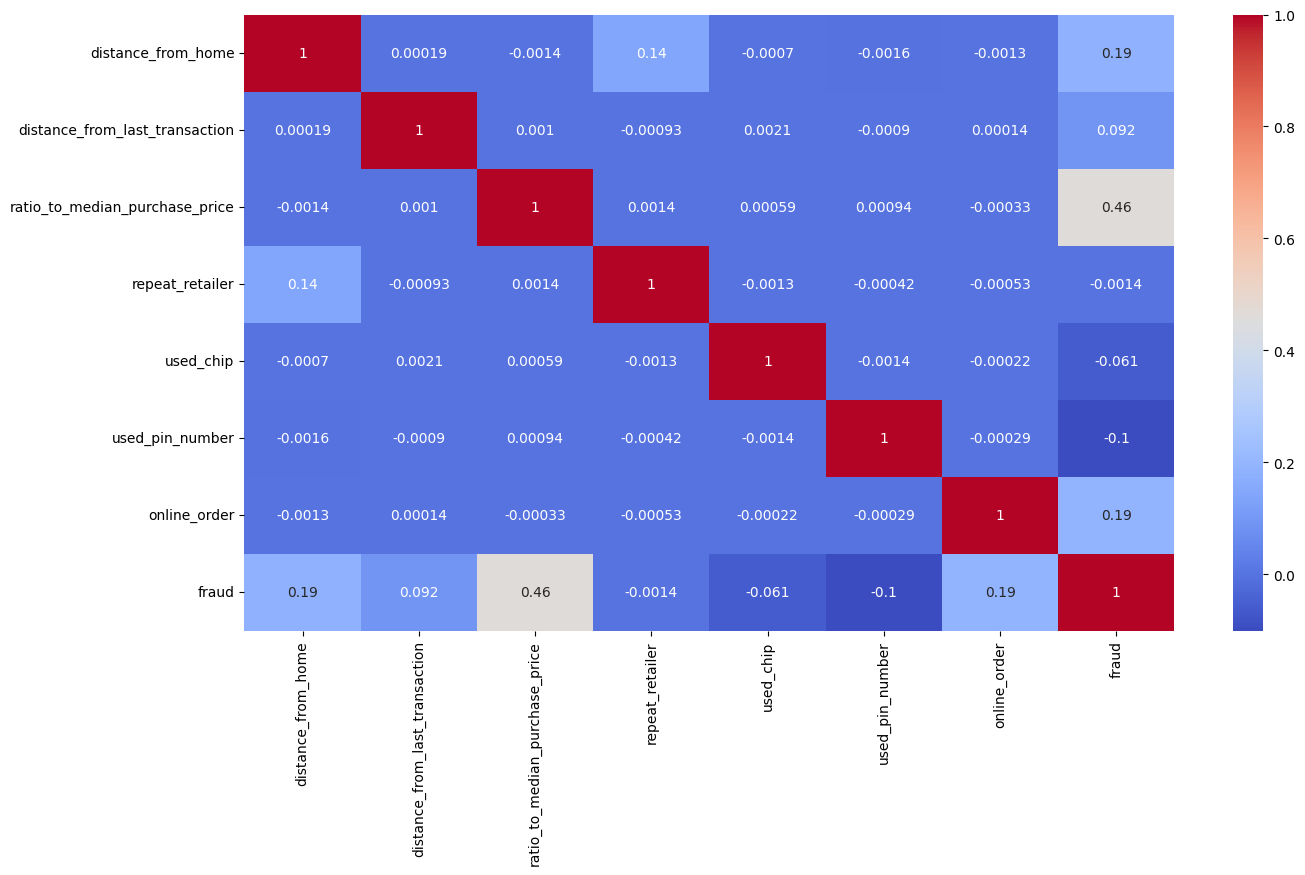

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix object
dataset_corr = dataset.corr()

# Create figure object
plt.figure(figsize=(15,8))

# Create heatmap using correlation matrix as input data
sns.heatmap(dataset_corr,
            annot=True,
            cmap="coolwarm")

# Show figure
plt.show()


# Discussion

# Conclusion

# Utils

Classifier Comparison : https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
Inutile enft : To plot multinomial and one vs rest logistic regression : https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html#sphx-glr-auto-examples-linear-model-plot-logistic-multinomial-py

Faire une matrice de correlation et supprimer les données fortement corrélé